In [35]:
# Initialize Otter
import otter
grader = otter.Notebook("hw07.ipynb")

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Homework 7: Bootstrapping

## Due Monday 3/3 at 11:59 pm

### Point Breakdown (43 pts): 
- 1a: 8 pts
- 1b: 7 pts
- 2a: 8 pts
- 2b: 2 pts
- 2c: 8 pts
- 2d: 10 pts
- 2e (optional): 0 pts

## Question 1: Bootstrapping with Cloudseed Data
For this question, we will be continuing data analysis with the cloud seed data from HW06. In case you forgot, `cloudseed.csv` contains precipitation data from a randomized experiment carried out in the 1970s in Florida to evaluate cloud seeding (a technique that involves injecting clouds with a chemical to increase rainfall). On each of 52 days suitable for cloud seeding, the experimenters used a random mechanism to decide whether to seed clouds or not. A plane flew through the clouds each day regardless of seeding, and the plane’s pilot did not know whether seeding was occurring. Precipitation was measured as total rain volume (in acre-feet) in the 24 hours following the plane’s run.

### Question 1a: Applying the Bootstrap (8 pts)
Use a bootstrap approach, resampling 1000 times, to separately calculate 95% confidence intervals for the mean rainfall in the unseeded data and seeded data. Save this interval to arrays `seeded_conf_interval` and `unseeded_conf_interval`, each of which should have two values, representing the 2.5th and 97.5th percentiles.


In [37]:
df=pd.read_csv('cloudseed.csv')

bootstrapped_means_seeded=[]
bootstrapped_means_unseeded=[]

for iteration in np.arange(1000):
    rand_values=np.random.choice(df['seeded'],len(df['seeded']))
    bootstrapped_means_seeded.append(np.mean(rand_values))
    
for iteration in np.arange(1000):
    rand_values=np.random.choice(df['unseeded'],len(df['unseeded']))
    bootstrapped_means_unseeded.append(np.mean(rand_values))
    
seeded_conf_interval = np.percentile(bootstrapped_means_seeded,[2.5,97.5])
unseeded_conf_interval = np.percentile(bootstrapped_means_unseeded,[2.5,97.5])
    
print(seeded_conf_interval)
print(unseeded_conf_interval)

[225.37528846 712.00105769]
[ 72.88942308 285.40519231]


In [38]:
grader.check("q1a")

q1a results: All test cases passed!

### Question 1b: Plotting Confidence Intervals (7 pts)

Scatter the seeded vs unseeded data and display the 95% confidence interval for each group as a vertical line, trying to recreate the plot shown below.
You may reuse some of your code from HW06. Your plot will be manually graded, and points will be awarded based on the following criteria:
- 1 pt: correct seeded & unseeded data
- 1 pt: markers for mean of each group
- 1 pt: correct x & y labels
- 4 pts: confidence intervals

<img src='./1b_plot.png' width="500px" />

<!-- BEGIN QUESTION -->



[Text(0, 0, 'Unseeded'), Text(1, 0, 'Seeded')]

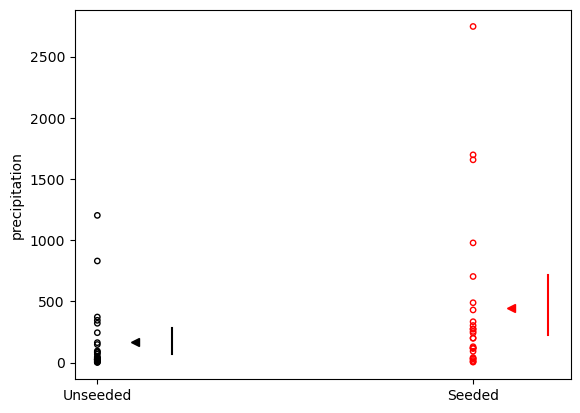

In [39]:
fig=plt.figure()
# fig.set_size_inches(5, 10)
ax1=fig.add_subplot(111)

ax1.scatter(np.zeros(len(df['seeded'])), df['unseeded'], edgecolor='k', s=15, facecolors= 'none')
ax1.plot(0.1, np.mean(df['unseeded']), '<', color='k')
ax1.plot([0.2,0.2], [unseeded_conf_interval[0], unseeded_conf_interval[1]], 'k')
ax1.scatter(np.zeros(len(df['seeded']),)+1, df['seeded'], edgecolor='r', s=15, facecolors= 'none')
ax1.plot(1.1, np.mean(df['seeded']), '<', color='r')
ax1.plot([1.2, 1.2], [seeded_conf_interval[0], seeded_conf_interval[1]], 'r')

ax1.set_ylabel('precipitation')
ax1.set_xticks([0,1])
ax1.set_xticklabels(['Unseeded', 'Seeded'])

<!-- END QUESTION -->

---
## Question 2: Bootstrapping with Genomic Data


The file `polymorphic.csv` was created using some of the supplementary materials of Ptak et al. (PLoS Biology 2004) [doi:10.1371/journal.pbio.0020155](doi:10.1371/journal.pbio.0020155). <br>  
The `Chimp` column is a name/number identifying a chimpanzee and the `Sequence` column lists sequences identifying single nucleotide polymorphisms. Each sequence is 57 base pairs long and each chimpanzee contributes two copies of the sequence, leading to 48 distinct sequences.

### Question 2a: Writing a Function that Calculates a Consensus Sequence From Many Variants (8 pts)
Write a function `consensus` that takes as input a list/series/array of equal-length sequences (strings composed of the characters A,C,G, or T). 
  
The function should return a string of the same length, where the character at each position is the most common character across the input strings.
If there are two or more equally common characters, the function should choose randomly from the most common characters.
  

**Hint:** To find the unique letters present at any given point in a sequence, consider using `np.unique()` with the `return_counts = True` flag. The output of this will be two arrays: one with the unique values, and another with the corresponding counts of each unique value.

In [40]:
ch_df=pd.read_csv('polymorphic.csv')

def consensus(sequences):
    seq_len = len(sequences[0])
    consensus_seq = ''
    
    for i in range(seq_len):
        current_chars = [seq[i] for seq in sequences]
        unique_chars, counts = np.unique(current_chars, return_counts=True)
        max_count_indices = np.where(counts == counts.max())[0]
        chosen_char = np.random.choice(unique_chars[max_count_indices])
        consensus_seq += chosen_char
        
    return consensus_seq

In [41]:
grader.check("q2a")

q2a results: All test cases passed!

### Question 2b: Determining the Consensus Sequence From the Chimpanzee Data (2 pts)

Use your consensus function to calculate the consensus sequence over the 48 sequences in `polymorphic.csv`.  
Assign the consensus sequence as a string to the variable `consensus_seq`. 


In [42]:
consensus_seq = consensus(ch_df['Sequence'])
print(consensus_seq)

ATACCCTGGAGGCAAGAATCTTCCGATAGACGCCAGTCCCTAGTTGTCCCCGACCTC


In [43]:
grader.check("q2b")

q2b results: All test cases passed!

### Question 2c: Calculating the Similarity of Each Sequence to the Consensus Sequence (8 pts)
Write a function named `similarity` that calculates the similarity of each observed sequence to the consensus sequence.

Calculate similarity as the proportion of nucleotides that match the consensus sequence.

The function should have 2 inputs: 
- the consensus sequence    
- a list or array of sequences that will be compared to the consensus sequence    

The function should output a dictionary with the sequence index as the key (e.g. 0,1,2,...,47) and the similarity proportion as a value. For instance, if a sequence is 97% similar to the consensus, the value should be 0.97.
<br>
Use your function to calculate the similarity of all 48 chimp sequences to the consensus sequence calculated in 2b. Assign the dictionary to the variable `consensus_dict`.

In [44]:
def similarity(consensus, sequences):
    seq_len = len(sequences[0])
    consensus_dict = {}
    index = -1
    for seq in sequences:
        index = index + 1
        same_chars=0
        for i in range(seq_len):
            if seq[i] == consensus[i]:
                same_chars = same_chars + 1
        proportion = same_chars / seq_len
        consensus_dict[index] = proportion
    return consensus_dict
        
# Test function with polymorphic data
consensus_dict = similarity(consensus_seq, ch_df['Sequence'])

print(consensus_dict)

{0: 1.0, 1: 0.9122807017543859, 2: 0.9298245614035088, 3: 0.7368421052631579, 4: 0.9122807017543859, 5: 0.7543859649122807, 6: 0.8771929824561403, 7: 0.7368421052631579, 8: 0.6491228070175439, 9: 0.5789473684210527, 10: 0.6491228070175439, 11: 0.5789473684210527, 12: 0.9649122807017544, 13: 0.9298245614035088, 14: 0.8947368421052632, 15: 0.8070175438596491, 16: 0.9649122807017544, 17: 0.8596491228070176, 18: 0.8947368421052632, 19: 0.6842105263157895, 20: 0.8070175438596491, 21: 0.6666666666666666, 22: 0.7543859649122807, 23: 0.7017543859649122, 24: 0.9122807017543859, 25: 0.7192982456140351, 26: 0.9473684210526315, 27: 0.9122807017543859, 28: 0.7719298245614035, 29: 0.7017543859649122, 30: 0.9298245614035088, 31: 0.9298245614035088, 32: 0.9473684210526315, 33: 0.9122807017543859, 34: 0.9649122807017544, 35: 0.8771929824561403, 36: 0.8070175438596491, 37: 0.6666666666666666, 38: 0.7894736842105263, 39: 0.7192982456140351, 40: 0.9298245614035088, 41: 0.7894736842105263, 42: 0.9649122807

In [45]:
grader.check("q2c")

q2c results: All test cases passed!

### Question 2d: Bootstrapping the Observed Sequences (10 pts)

What consensus sequences might we measure with more extensive sampling? To determine this, bootstrap the sequences `100 times`, selecting 48 random sequences each time with replacement.  
Append the consensus sequence chosen each time to a list named `bootstrapped_consensus_list`. Then, create a Pandas dataframe named `sequence_counts` with 2 columns (named exactly as shown here):
- `Sequence`: each unique sequence that appears in `bootstrapped_consensus_list`
- `Count`: the number of times the Sequence appears

**Hint**: Use the `np.unique()` method, as described in the Hint of Question 2a.





In [46]:
num_bootstraps = 100
bootstrapped_consensus_list = []

for i in range(num_bootstraps):
    bootstrapped_seq = np.random.choice(ch_df['Sequence'], size=48, replace = True)
    bootstrapped_consensus = consensus(bootstrapped_seq)
    bootstrapped_consensus_list.append(bootstrapped_consensus)
    
sequence_counts = pd.DataFrame(np.unique(bootstrapped_consensus_list, return_counts=True)).T
sequence_counts.columns = ['Sequence', 'Count']
                                        
# This code will order your dataframe so that you can see the sequences in order of frequency
sequence_counts.sort_values(by=['Count'], ascending=False)

,Sequence,Count
11,ATACCCTGGAGGCAAGAATCTTCCGATAGACGCCAGTCCCTAGTTG...,34
8,ATACCCTGGAGGCAAAAATCTTCCGATAGACGCCAGTCCCTAGTTG...,30
7,ATACCCTGGAGGCAAAAATCTTCCGATAGACGCCAGTCCCTAGTTG...,15
6,ATACCCTGGAGGCAAAAATCTTCCGATAGACCCCAGTCCCTAGTTG...,6
9,ATACCCTGGAGGCAAGAATCTTCCGATAGACCCCAGTCCCTAGTTG...,6
0,ATACCCTGGAGATAAAAATCTTCCGATAGACCCCAGTCCCTAGTTG...,1
1,ATACCCTGGAGATAAAAATCTTCCGATAGACCCCAGTCCCTAGTTG...,1
2,ATACCCTGGAGATAAAAATCTTCCGATAGACCCCAGTCCCTAGTTG...,1
3,ATACCCTGGAGATAAGAATCTTCCGATAGACCCCAGTCCCTAGTTG...,1
4,ATACCCTGGAGATAAGAATCTTCCGATAGACCCCAGTCCCTAGTTG...,1


In [47]:
grader.check("q2d")

q2d results: All test cases passed!

### Question 2e (Optional): Visualizing Your Results (0 pts)
The following visualization shows the consensus sequence in the top row and then each of the 48 sequences in subsequent rows. The similarity score is plotted to the right and chimp name to the left. Differences from the consensus sequences are plotted with red characters.
Try to make this visualization, or something like it,  using matplotlib. Feel free to modify parts to your own liking or improve aspects that could be better.

**Hints:**
- You can use calls to `ax.text`in a for loop to plot individual characters in a controlled position.
- You can remove all axis elements (spines, ticks, ticklabels, etc.) by calling `ax.axis('off')`<br>.

<img src="sequence_similarity.svg" width=1600 height=1600/>

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)